1 Opérations de base d'un réseau ConvNet

In [90]:
#Demander n, m 
n = int(input("Entrer la valeur n:"))
m = int(input("Entrer la valeur m:"))

In [91]:
#Remplir aléatoirement l'image I de taille nxn entre 0 et 255
import numpy as np
I = np.random.randint(0, 256, (n, n))
print("Image I:")
print(I)

Image I:
[[135 193 193 192 152 166  52   5 194 159]
 [ 16 234 184 128 176 120 250  39 127 173]
 [198   2 215 139  49 143 187  44 192 102]
 [ 29 144 115 225  43  63 153 135  98  77]
 [236   2 130 105  41  18  39 243  65 118]
 [ 25  82 141 127 100 116 206 173   8 110]
 [187  60  96 124 111  89  46  49  71   6]
 [155  14  15 222 251 149 208 249 177 148]
 [124 243   5  14 117  50 196 221 214  91]
 [ 63 181 234  96  96 119  55 176 137 213]]


In [92]:
#Normaliser l'image I entre 0 et 1
I_normalized = I / 255.0
print("Image I normalisée:")
print(I_normalized)

Image I normalisée:
[[0.52941176 0.75686275 0.75686275 0.75294118 0.59607843 0.65098039
  0.20392157 0.01960784 0.76078431 0.62352941]
 [0.0627451  0.91764706 0.72156863 0.50196078 0.69019608 0.47058824
  0.98039216 0.15294118 0.49803922 0.67843137]
 [0.77647059 0.00784314 0.84313725 0.54509804 0.19215686 0.56078431
  0.73333333 0.17254902 0.75294118 0.4       ]
 [0.11372549 0.56470588 0.45098039 0.88235294 0.16862745 0.24705882
  0.6        0.52941176 0.38431373 0.30196078]
 [0.9254902  0.00784314 0.50980392 0.41176471 0.16078431 0.07058824
  0.15294118 0.95294118 0.25490196 0.4627451 ]
 [0.09803922 0.32156863 0.55294118 0.49803922 0.39215686 0.45490196
  0.80784314 0.67843137 0.03137255 0.43137255]
 [0.73333333 0.23529412 0.37647059 0.48627451 0.43529412 0.34901961
  0.18039216 0.19215686 0.27843137 0.02352941]
 [0.60784314 0.05490196 0.05882353 0.87058824 0.98431373 0.58431373
  0.81568627 0.97647059 0.69411765 0.58039216]
 [0.48627451 0.95294118 0.01960784 0.05490196 0.45882353 0.1

In [93]:
#Remplir aléatoirement le filtre W de taille mxm entre -1 et 1
W = np.random.uniform(-1, 1, (m, m))
print("Filtre W:")
print(W)

Filtre W:
[[-0.93788618  0.91786326 -0.36998313  0.08577531 -0.49478523]
 [ 0.06724765 -0.17616937  0.64102743 -0.9344259   0.21537422]
 [-0.10362491  0.32974278 -0.42831222  0.17195643 -0.5577771 ]
 [ 0.24506742  0.69628114 -0.23345263  0.8227842   0.95759244]
 [-0.36594603  0.26575388  0.15210326 -0.01143852 -0.25855771]]


In [94]:
#Calcule de la matrice de la convolution (fomule = somme I[i+num1][j+num2]*W[num1][num2]  pour num1 et num2 de 0 à m-1)
#puis ajout du biais 1.0
#application de la fonction d'activation sigmoïde (sigmoïde(x) = 1/(1+exp(-x)))

taille_conv = n - m + 1
conv_matrix = np.zeros((taille_conv, taille_conv))
biais = 1.0
for num1 in range(taille_conv):
    for num2 in range(taille_conv):
        for num11 in range(m):
            for num22 in range(m):
                conv_matrix[num1, num2] += I_normalized[num1 + num11, num2 + num22] * W[num11, num22]
                val = conv_matrix[num1, num2] + biais
                conv_matrix[num1, num2] = 1 / (1 + np.exp(-val))
print("Matrice de convolution après application du biais et de la fonction sigmoïde:")
print(conv_matrix)

Matrice de convolution après application du biais et de la fonction sigmoïde:
[[0.86114489 0.86395637 0.8613825  0.83473887 0.85804611 0.85168893]
 [0.85385395 0.85183082 0.83989648 0.84429612 0.86514629 0.85270983]
 [0.85240694 0.85523675 0.8605577  0.86019587 0.85744444 0.86529541]
 [0.83347269 0.84752651 0.83976926 0.83395124 0.84382614 0.84776054]
 [0.85165867 0.85993471 0.84130176 0.83773538 0.83881286 0.85502426]
 [0.85447912 0.85143266 0.8594172  0.84400227 0.84899905 0.83898925]]


In [95]:
#Ajouter une couche de pooling (prendre la fonction max comme fonction de pooling).
#Il y aurait une petite précaution à prendre dans le cas ou taille_conv est impair

taille_pool = int(taille_conv/2) 

pool = np.zeros((taille_pool, taille_pool))

for num1 in range(taille_pool):
    for num2 in range(taille_pool):
        val = max(conv_matrix[2*num1,2*num2],conv_matrix[2*num1,2*num2+1],conv_matrix[2*num1+1,2*num2],conv_matrix[2*num1+1,2*num2+1])
        pool[num1,num2] = val
print("Matrice après pooling:")
print(pool)

Matrice après pooling:
[[0.86395637 0.8613825  0.86514629]
 [0.85523675 0.8605577  0.86529541]
 [0.85993471 0.8594172  0.85502426]]


2 - Récupération et étude des données MNIST

In [96]:
#1. Rcupérez les données MNIST
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
#Récupération et étude des données

data = mnist.load_data()

In [97]:
#2 - Pour chaque composante des données vérifiez ses dimensions, le type de son contenu et les valeurs extrêmales.
data1 = data[0]
data2 = data[1]

print (type(data1))
print(len(data1))

print (type(data2))
print(len(data2))

<class 'tuple'>
2
<class 'tuple'>
2


In [98]:
#Le type
data11 = data1[0]
data12 = data1[1]

data21 = data2[0]
data22 = data2[1]

print(type(data11))
print(type(data12))
print(type(data21))
print(type(data22))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [99]:
#Dimensions
print(np.shape(data11))
print(np.shape(data12))
print(np.shape(data21))
print(np.shape(data22))

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


60 000 images de tailles 28x28 (Train)
10 000 images de tailles 28x28 (Test)

In [100]:
#valeurs extrêmales
print(np.min(data11))
print(np.max(data11))

0
255


In [101]:
#valeurs extrêmales
print(np.min(data12))
print(np.max(data12))

0
9


In [102]:
#valeurs extrêmales
print(np.min(data21))
print(np.max(data21))

0
255


In [103]:
#valeurs extrêmales
print(np.min(data22))
print(np.max(data22))

0
9


In [104]:
#3 - Transformez l'ensemble des images d'apprentissage (resp. de test) en une seule matrice de réels compris entre 0 et 1

# Conversion en float et normalisation dans [0,1]
X_train = data11.astype('float32') / 255.0
X_test  = data21.astype('float32') / 255.0

# Aplatir chaque image en un vecteur de 28*28 = 784 valeurs
X_train = X_train.reshape((X_train.shape[0], -1))
X_test  = X_test.reshape((X_test.shape[0], -1))

# Vérifications
print("X_train shape:", X_train.shape, "dtype:", X_train.dtype, "min:", X_train.min(), "max:", X_train.max())
print("X_test  shape:", X_test.shape,  "dtype:", X_test.dtype,  "min:", X_test.min(),  "max:", X_test.max())

print("Labels shapes (train, test):", data12.shape, data22.shape)
if X_train.shape[0] != data12.shape[0] or X_test.shape[0] != data22.shape[0]:
    raise ValueError("Mismatch entre le nombre d'images et d'étiquettes")

X_train shape: (60000, 784) dtype: float32 min: 0.0 max: 1.0
X_test  shape: (10000, 784) dtype: float32 min: 0.0 max: 1.0
Labels shapes (train, test): (60000,) (10000,)


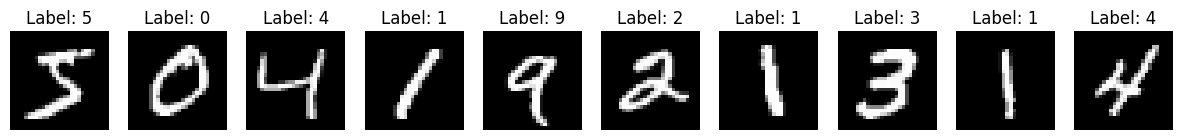

In [105]:
#4. Visualisez quelques images
nb_images_display = 10
fig, axes = plt.subplots(1, nb_images_display, figsize=(15,5))
for i in range(nb_images_display):
    axes[i].imshow(data11[i], cmap='gray')
    axes[i].set_title(f"Label: {data12[i]}")
    axes[i].axis('off')


4 - Keras/Tensorow : notre premier réseau ConvNet

In [106]:
#1. Chargez la base mnist des chiffres manuscrits
from tensorflow.keras.datasets import mnist

#  et en extraire 1000 exemples pour l'apprentissage et 100 exemples pour le test
(X_train_1000, Y_train_1000), (X_test_100, Y_test_100) = mnist.load_data()
X_train_1000 = X_train_1000[:1000]
Y_train_1000 = Y_train_1000[:1000]
X_test_100 = X_test_100[:100]
Y_test_100 = Y_test_100[:100]

print("X_train_1000:", X_train_1000.shape, "Y_train_1000:", Y_train_1000.shape)
print("X_test_100:", X_test_100.shape, "Y_test_100:", Y_test_100.shape)

X_train_1000: (1000, 28, 28) Y_train_1000: (1000,)
X_test_100: (100, 28, 28) Y_test_100: (100,)


In [107]:
#2 Transformez les ensembles d'apprentissage et de test en tenseurs de dimension 4 : 
# nombre_images X largeur X longueur X 1 (cette transformation est supposée par le traitement qui va suivre).

X_train = X_train_1000.reshape((X_train_1000.shape[0], X_train_1000.shape[1], X_train_1000.shape[2],1))
X_test = X_test_100.reshape((X_test_100.shape[0], X_test_100.shape[1], X_test_100.shape[2],1))

In [108]:
#3. Normalisez les niveaux de gris pour les ramener entre 0 et 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [109]:
#4 Transformez les données y test et y train en données qualitatives (ayant donc autant de
#  modalitées qu'il y a de chiffres, cette transformation est supposée par le traitement qui va suivre).

from tensorflow.keras.utils import to_categorical

Y_train_1000 = to_categorical(Y_train_1000, 10)
Y_test_100 = to_categorical(Y_test_100, 10)

In [110]:
#5. Créez un réseau de neurones convolutionnel avec dans l'ordre la couche d'entrée,
# une couche convolutionnelle, une deuxième couche convolutionnelle, une couche
# Pooling, une couche Dropout, une couche Flatten, une couche Dense, une deuxième
# couche Dropout, la couche de sortie.

from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

c:\Program Files\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [111]:
#6. Affichez une description du réseau et vérifier la cohérence de cette description.
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

In [112]:
#7. Complétez le programme en ajoutant la compilation, l'apprentissage et l'évaluation.

#compilation 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#apprentissage
model.fit(X_train, Y_train_1000, batch_size=32, epochs=10, verbose=1)

#évaluation
score = model.evaluate(X_test, Y_test_100, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5510 - loss: 1.3451
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8090 - loss: 0.6101
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8930 - loss: 0.3738
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9230 - loss: 0.2609
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9390 - loss: 0.2034
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9530 - loss: 0.1613
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9550 - loss: 0.1225
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9640 - loss: 0.1021
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9760 - loss: 0.0996
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9620 - loss: 0.0981
Test loss: 0.05869956314563751
Test accuracy: 0.9800000190734863
